<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Natural Language Processing</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

np.random.seed(123)

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: ada0d41c33546e250d7a5ace74624d6ece6f91ef

pandas    : 1.1.3
keras     : 2.4.3
tensorflow: 2.5.0
watermark : 2.1.0
numpy     : 1.19.2
json      : 2.0.9
matplotlib: 3.3.2



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 77s 228ms/step - loss: 0.6699 - accuracy: 0.5658 - val_loss: 0.4298 - val_accuracy: 0.8122
Epoch 2/10
196/196 [==============================] - 43s 220ms/step - loss: 0.3895 - accuracy: 0.8351 - val_loss: 0.3958 - val_accuracy: 0.8417
Epoch 3/10
196/196 [==============================] - 42s 214ms/step - loss: 0.2779 - accuracy: 0.8923 - val_loss: 0.4438 - val_accuracy: 0.7921
Epoch 4/10
196/196 [==============================] - 29s 148ms/step - loss: 0.2154 - accuracy: 0.9193 - val_loss: 0.3667 - val_accuracy: 0.8412
Epoch 5/10
196/196 [==============================] - 22s 110ms/step - loss: 0.1389 - accuracy: 0.9535 - val_loss: 0.4034 - val_accuracy: 0.8520
Epoch 6/10
196/196 [==============================] - 21s 107ms/step - loss: 0.0870 - accuracy: 0.9731 - val_loss: 0.4518 - val_accuracy: 0.8436
Epoch 7/10
196/196 [==============================] - 21s 110ms/step - loss: 0.0612 - accuracy: 0.9813 - val_loss: 0.5040 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)

    fig.tight_layout()

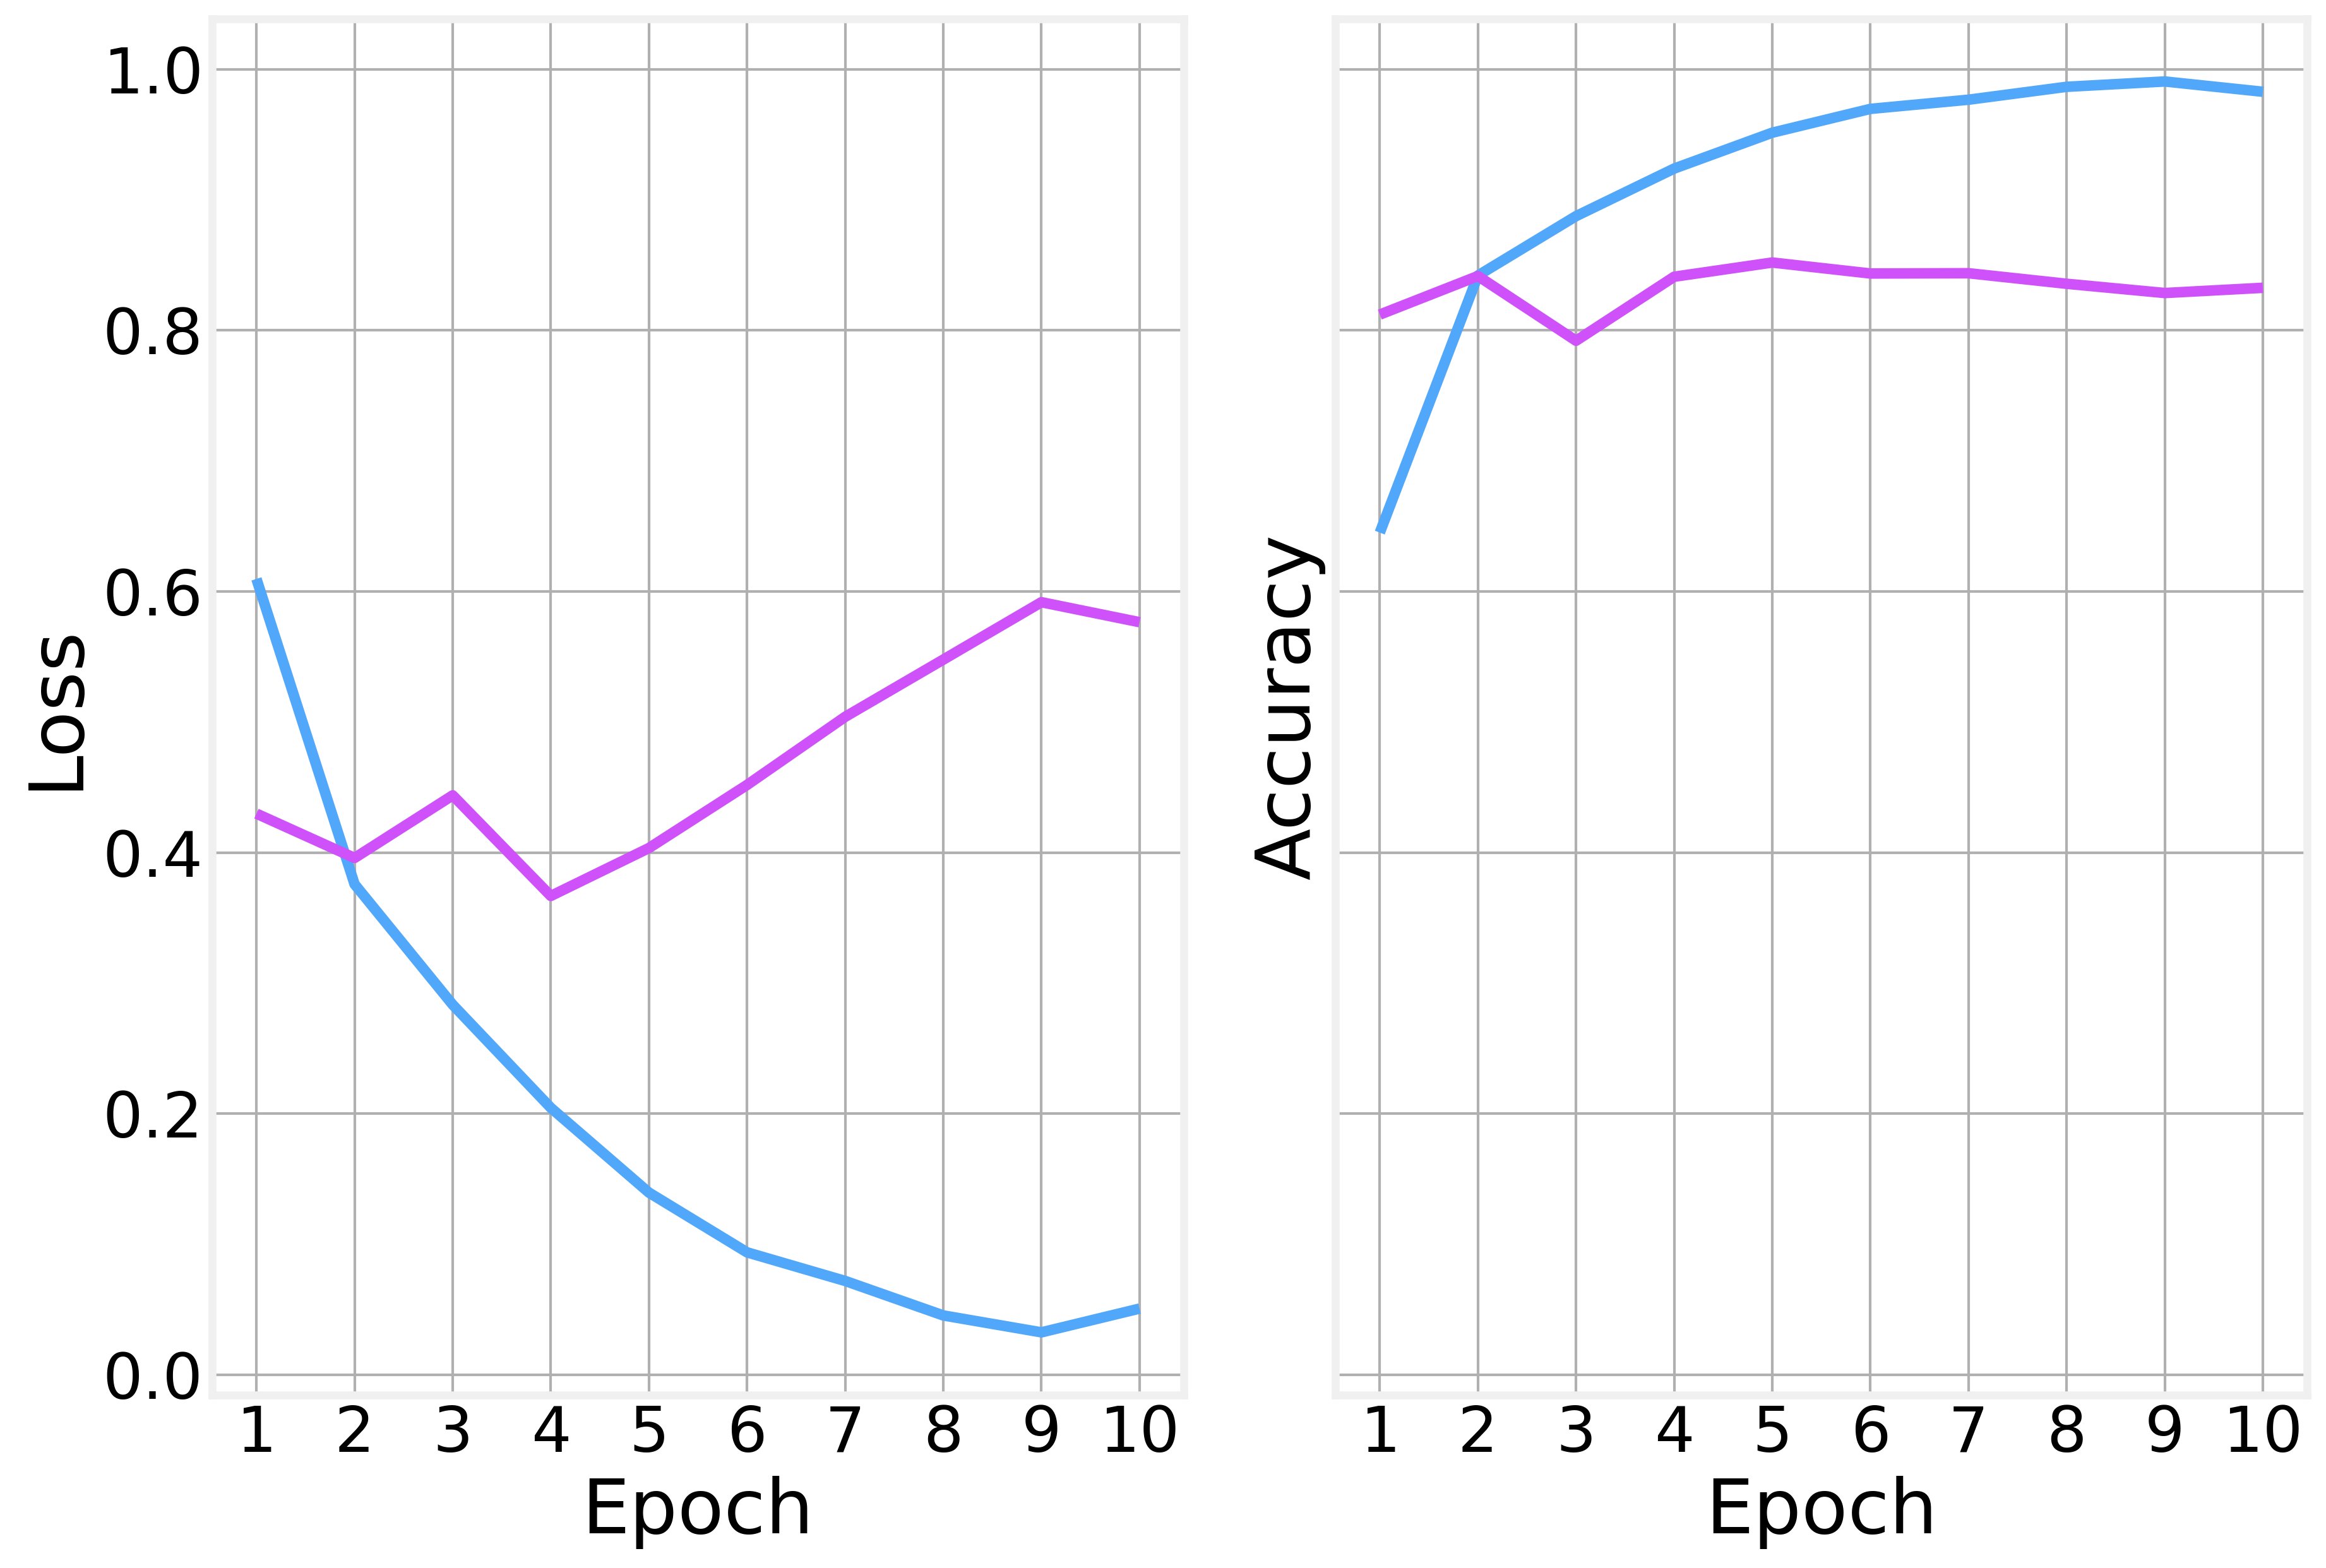

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 39s 185ms/step - loss: 0.6047 - accuracy: 0.6389 - val_loss: 0.3295 - val_accuracy: 0.8602
Epoch 2/10
196/196 [==============================] - 38s 195ms/step - loss: 0.2602 - accuracy: 0.9005 - val_loss: 0.3254 - val_accuracy: 0.8621
Epoch 3/10
196/196 [==============================] - 39s 199ms/step - loss: 0.1921 - accuracy: 0.9299 - val_loss: 0.3134 - val_accuracy: 0.8718
Epoch 4/10
196/196 [==============================] - 39s 199ms/step - loss: 0.1465 - accuracy: 0.9516 - val_loss: 0.3423 - val_accuracy: 0.8649
Epoch 5/10
196/196 [==============================] - 41s 208ms/step - loss: 0.1215 - accuracy: 0.9597 - val_loss: 0.3851 - val_accuracy: 0.8686
Epoch 6/10
196/196 [==============================] - 41s 212ms/step - loss: 0.0940 - accuracy: 0.9711 - val_loss: 0.4180 - val_accuracy: 0.8581
Epoch 7/10
196/196 [==============================] - 42s 215ms/step - loss: 0.0820 - accuracy: 0.9730 - val_loss: 0.4463 - val_ac

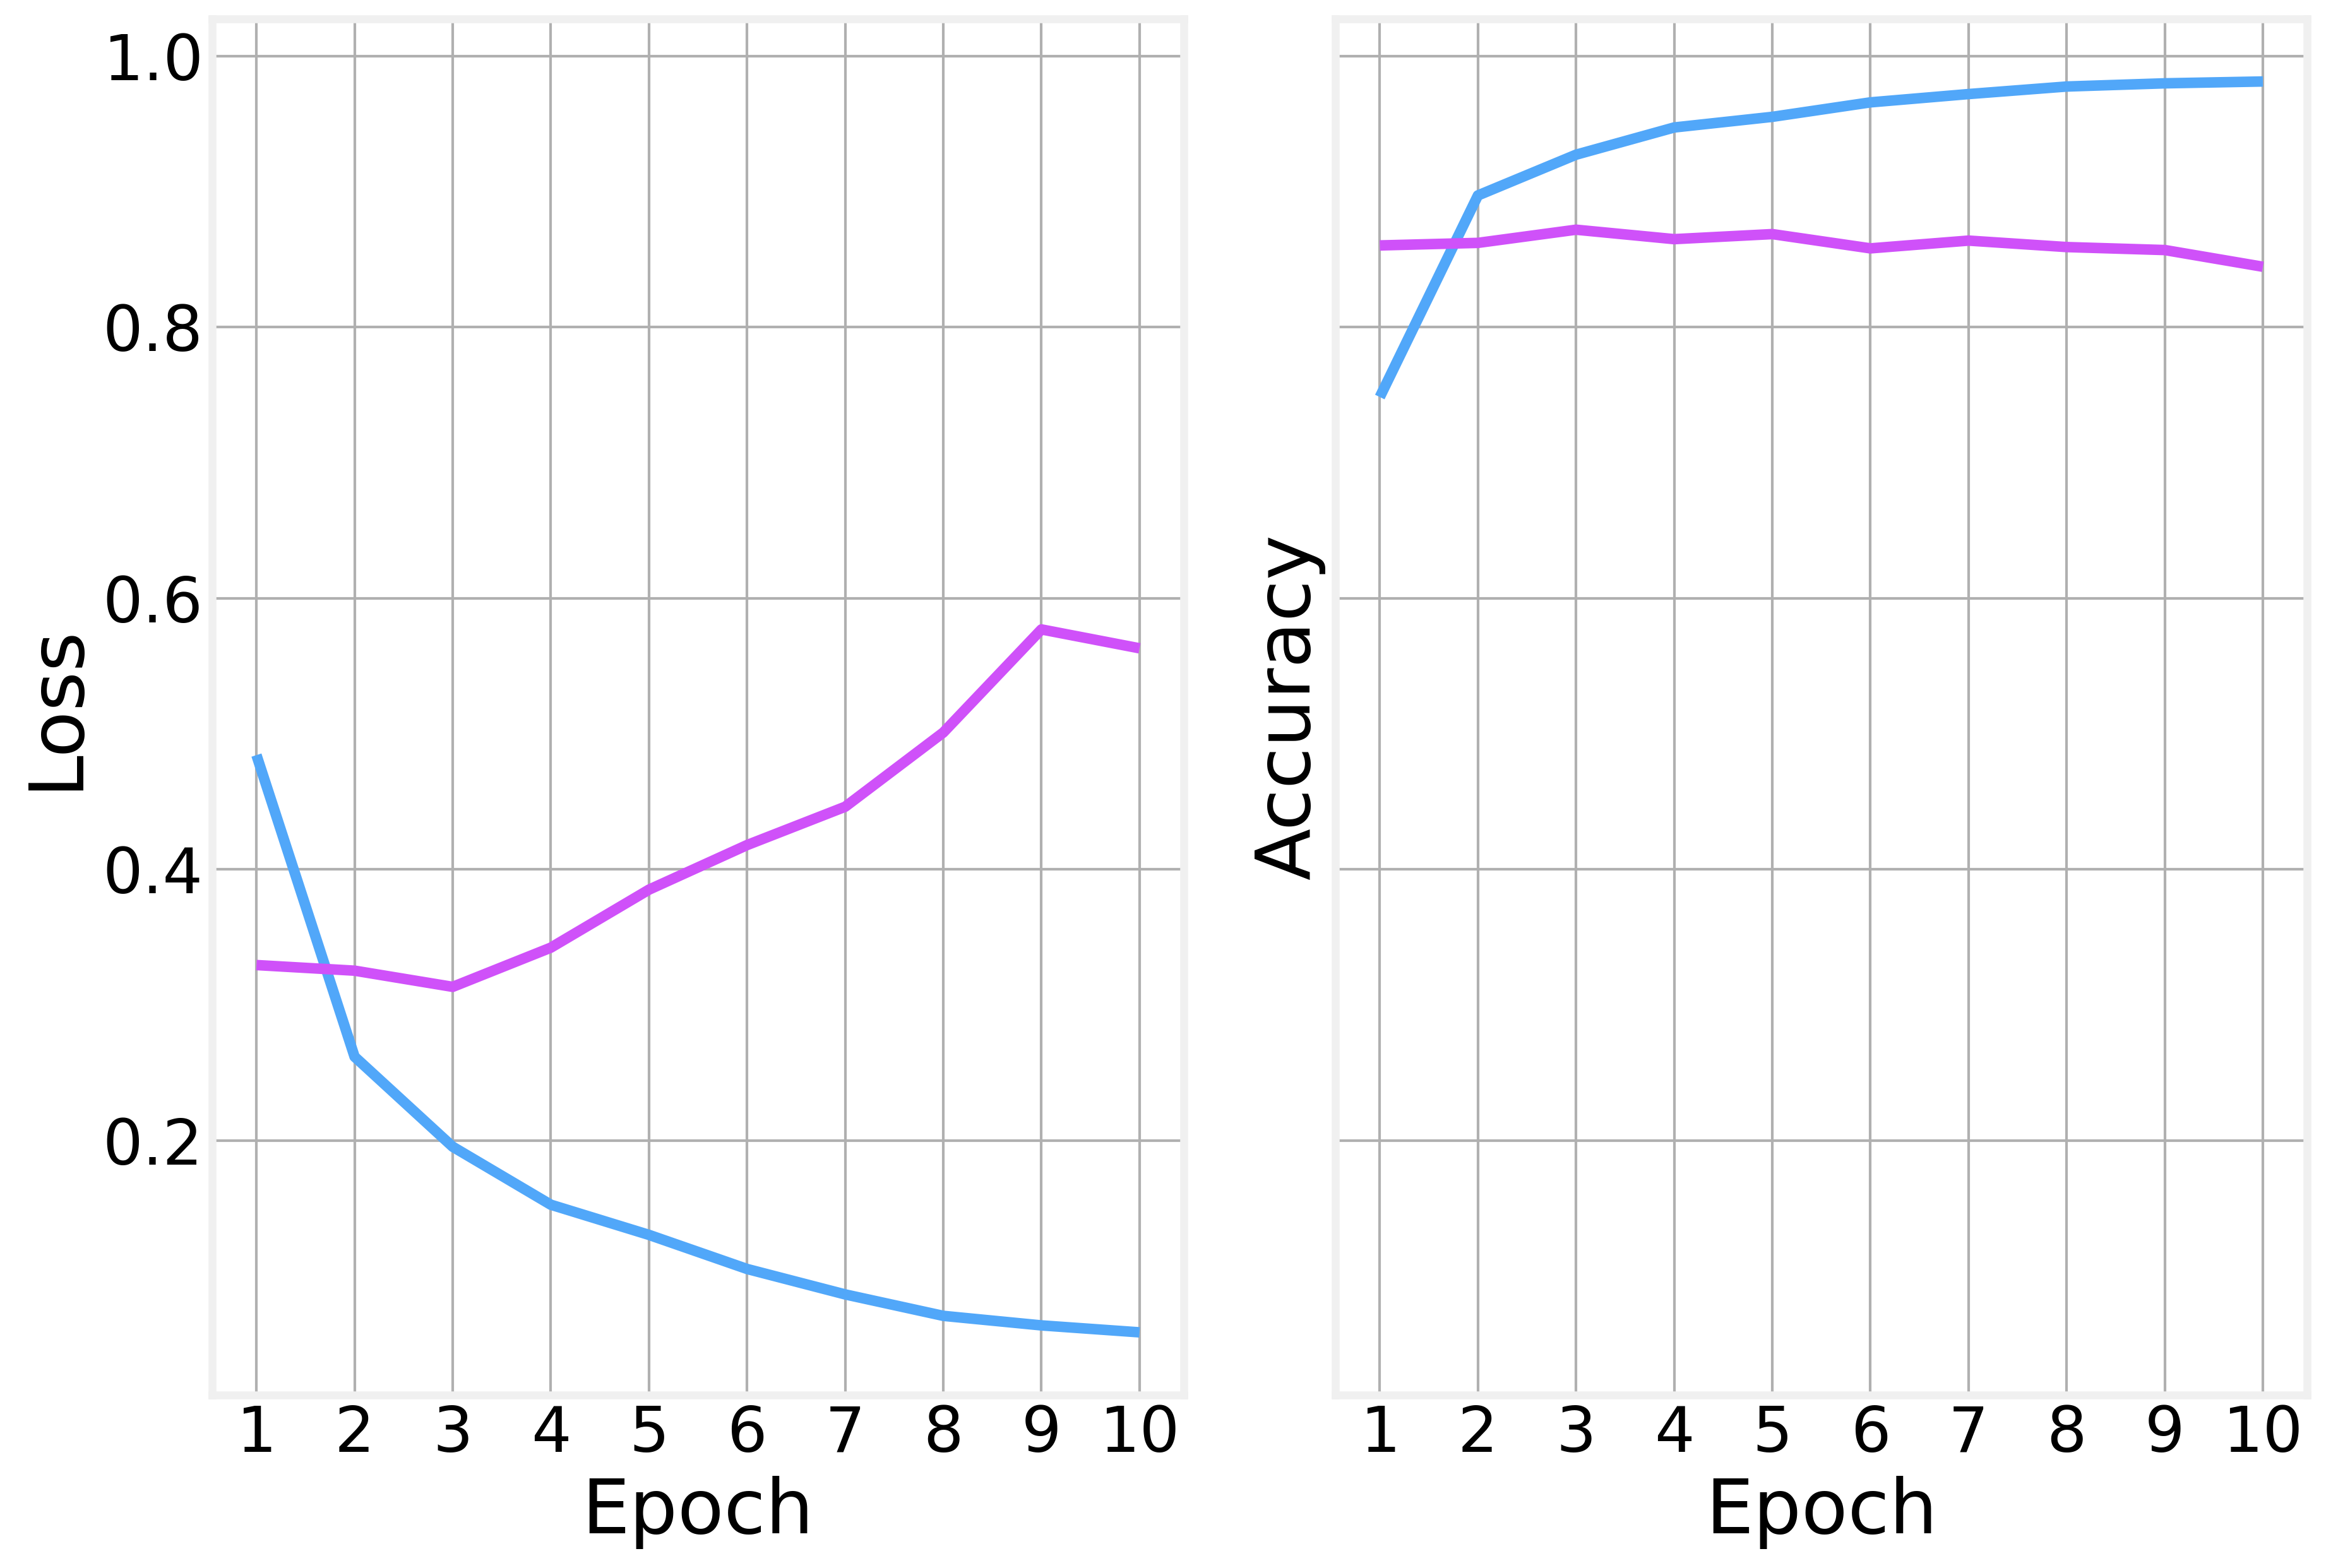

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 51s 245ms/step - loss: 0.5749 - accuracy: 0.6771 - val_loss: 0.3287 - val_accuracy: 0.8678
Epoch 2/10
196/196 [==============================] - 41s 212ms/step - loss: 0.2424 - accuracy: 0.9076 - val_loss: 0.3172 - val_accuracy: 0.8762
Epoch 3/10
196/196 [==============================] - 44s 222ms/step - loss: 0.1659 - accuracy: 0.9424 - val_loss: 0.3179 - val_accuracy: 0.8773
Epoch 4/10
196/196 [==============================] - 45s 232ms/step - loss: 0.1333 - accuracy: 0.9566 - val_loss: 0.3646 - val_accuracy: 0.8649
Epoch 5/10
196/196 [==============================] - 44s 227ms/step - loss: 0.1193 - accuracy: 0.9597 - val_loss: 0.3646 - val_accuracy: 0.8591
Epoch 6/10
196/196 [==============================] - 45s 231ms/step - loss: 0.0871 - accuracy: 0.9739 - val_loss: 0.4229 - val_accuracy: 0.8585
Epoch 7/10
196/196 [==============================] - 42s 217ms/step - loss: 0.0849 - accuracy: 0.9734 - val_loss: 0.4752 - val_ac

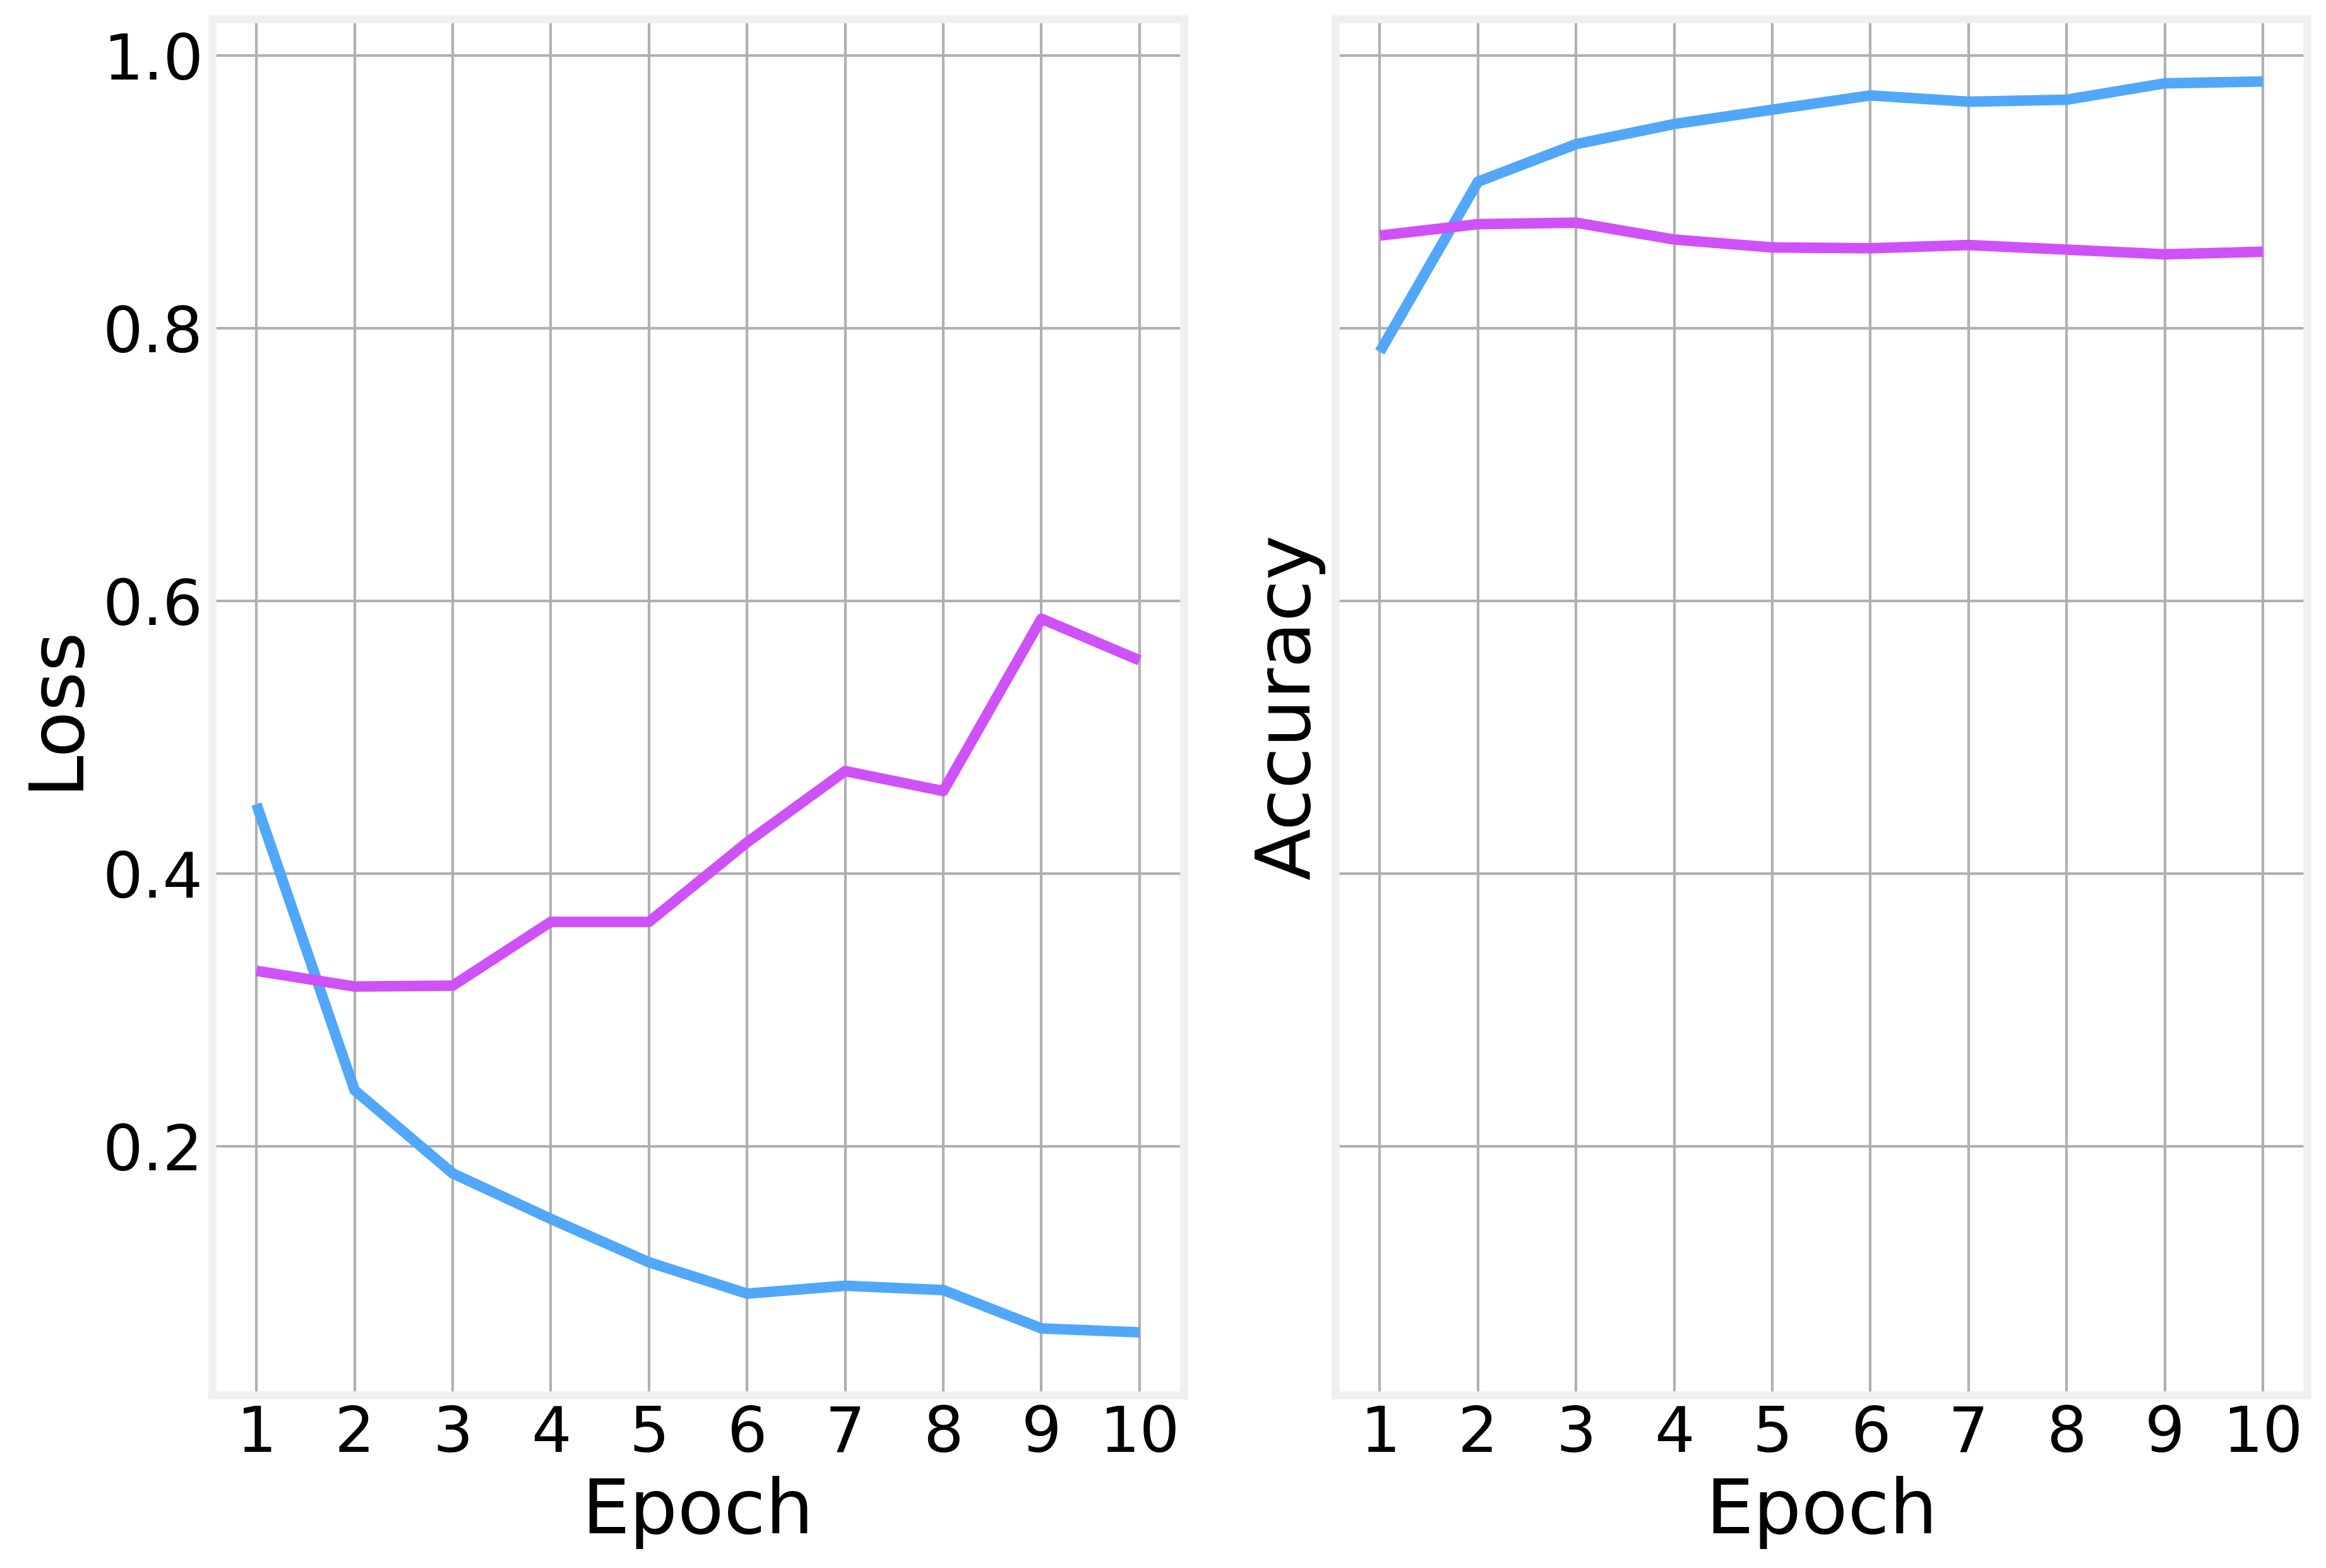

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>